In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [9]:
df = pd.read_csv(os.path.join("db", "Abricate_results_summary.tsv"), sep='\t')
df = df.rename(columns={'#FILE': 'Assembly Barcode'})
df = df.drop(columns=['NUM_FOUND'])
df['Assembly Barcode'] = df['Assembly Barcode'].str.replace(r'(\..*)', '', regex=True)
df = df.set_index('Assembly Barcode')
plasmids = df.columns.tolist()
df[plasmids] = df[plasmids].applymap(lambda x: 0 if x == '.' else 1)

data = pd.read_csv(os.path.join("out", "Salmonella_Chile_201124_filt.tsv"), sep='\t')
data = data[['Assembly Barcode', 'SISTR1 Serovar', 'HC20', 'HC50']]
def truncar(s):
    l = 20
    if len(s) > l:
        return s[:l] + '...'
    return s
df_truncado = data.copy()
data['SISTR1 Serovar'] = data['SISTR1 Serovar'].apply(truncar)
db = pd.merge(df, data, on='Assembly Barcode', how='left').reset_index(drop=True)
db['HC20'] = db['HC20'].astype(str)
db['HC50'] = db['HC50'].astype(str)
db['SISTR1 Serovar HC20'] = db['SISTR1 Serovar'] + " " + db['HC20']
db['SISTR1 Serovar HC50'] = db['SISTR1 Serovar'] + " " + db['HC50']
db = db.set_index('SISTR1 Serovar')
db.to_csv("out/abricate_summary_procesado_barcode.tsv", index=False, sep='\t')
df

,Col(MG828)_1,Col(VCM04)_1,Col(Ye4449)_1,Col(pB8919)_1,Col(pHAD28)_1,Col156_1,Col3M_1,Col440II_1,Col440I_1,ColE10_1,...,IncX3_1,IncX4_1,IncX4_2,IncY_1,p0111_1,pEC4115_1,pESA2_1,pKPC-CAV1321_1,repB(R1701)_1,repE(pEh60-7)_1
Assembly Barcode,,,,,,,,,,,,,,,,,,,,,
SAL_AC6595AA_AS,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAL_AC6596AA_AS,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
SAL_AC6597AA_AS,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAL_AC6600AA_AS,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
SAL_AC7029AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAL_ZC9426AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
SAL_ZC9427AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAL_ZC9428AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
SEROTIPOS = ['Typhimurium', 'Newport', 'Enteritidis', 'Infantis', 'I 1,4,[5],12:i:-', 'Agona']

### HC20

In [11]:
"""
Se coloca como index los cluster HC
"""
db_HC = db.set_index('SISTR1 Serovar HC20')
db_HC = db_HC.sort_values(by='SISTR1 Serovar HC20')
db_HC = db_HC.drop(columns=['SISTR1 Serovar HC50'])
# Agrupo
matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC20').sum()
# Ordeno mono de Typhimurium
mono = ['I 1,4,[5],12:i:- 2', 'I 1,4,[5],12:i:- 48']
new_sort = [idx for idx in matrix_genomas_HC.index if idx not in mono] + mono
matrix_genomas_HC = matrix_genomas_HC.reindex(new_sort)
matrix_genomas_HC

/tmp/ipykernel_9145/4246728112.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC20').sum()


,Col(MG828)_1,Col(VCM04)_1,Col(Ye4449)_1,Col(pB8919)_1,Col(pHAD28)_1,Col156_1,Col3M_1,Col440II_1,Col440I_1,ColE10_1,...,IncX3_1,IncX4_1,IncX4_2,IncY_1,p0111_1,pEC4115_1,pESA2_1,pKPC-CAV1321_1,repB(R1701)_1,repE(pEh60-7)_1
SISTR1 Serovar HC20,,,,,,,,,,,,,,,,,,,,,
Adelaide 302263,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Adelaide 465232,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Agona 147593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Agona 302285,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agona 362413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Typhimurium 75360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Typhimurium 777,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Worthington 147475,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


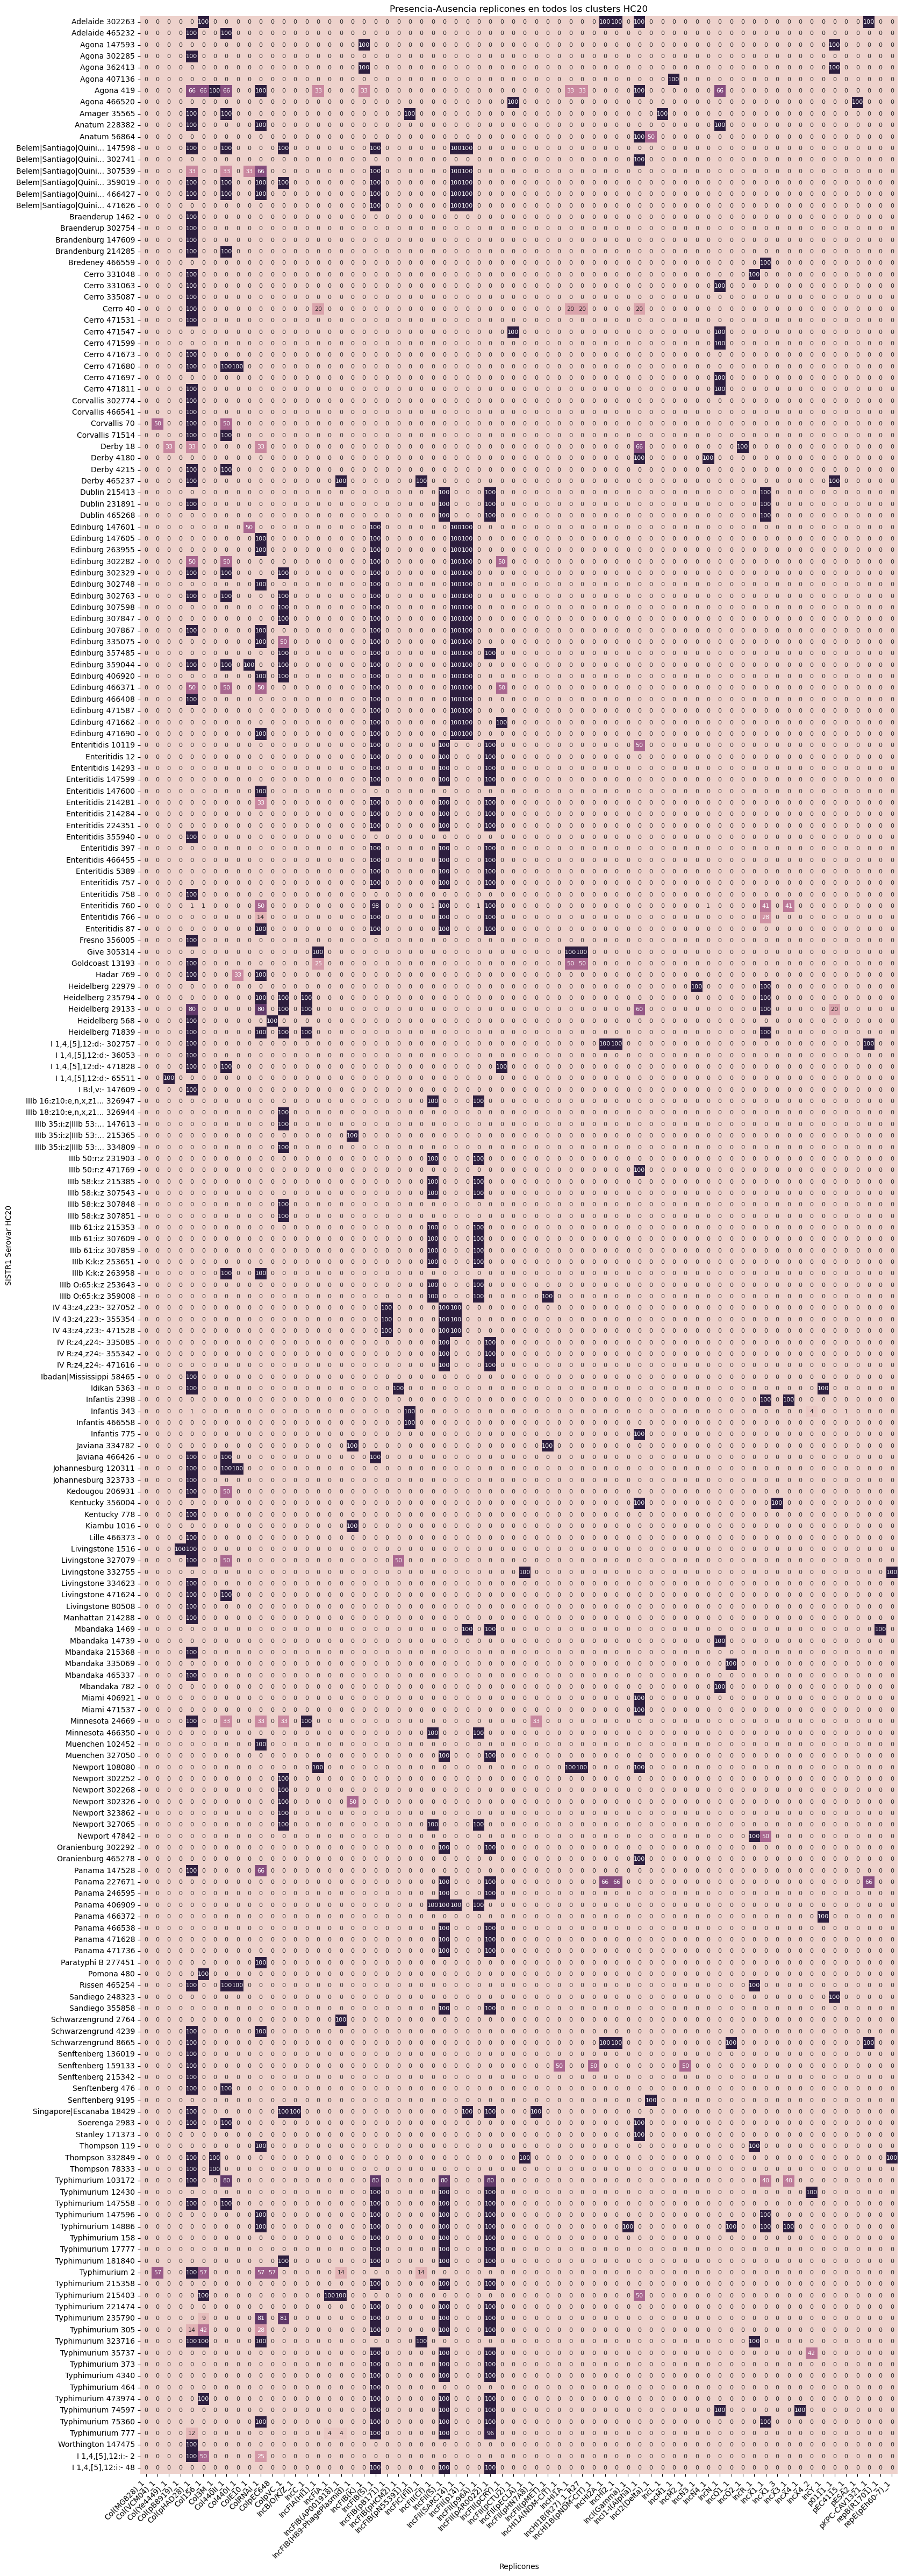

In [12]:
"""
Mapa de calor, porcentaje replicones en cluster HC
"""
HC = 'HC20'
heat_map = matrix_genomas_HC.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(56, 48))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'Presencia-Ausencia replicones en todos los clusters {HC}')
plt.xlabel('Replicones')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_replicon.png', format='png', bbox_inches='tight')
plt.show()

In [22]:
"""
Se coloca como index de los cluster HC de importancia
"""
db_HC_de_importancia = db[db.index.isin(SEROTIPOS)]
db_HC = db_HC_de_importancia.set_index('SISTR1 Serovar HC20')
db_HC = db_HC.sort_values(by='SISTR1 Serovar HC20')
db_HC = db_HC.drop(columns=['SISTR1 Serovar HC50'])
# Agrupo
matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC20').sum()
# Ordeno mono de Typhimurium
mono = ['I 1,4,[5],12:i:- 2', 'I 1,4,[5],12:i:- 48']
new_sort = [idx for idx in matrix_genomas_HC.index if idx not in mono] + mono
matrix_genomas_HC = matrix_genomas_HC.reindex(new_sort)
matrix_genomas_HC.head(4)

/tmp/ipykernel_9145/172586452.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC20').sum()


,Col(MG828)_1,Col(VCM04)_1,Col(Ye4449)_1,Col(pB8919)_1,Col(pHAD28)_1,Col156_1,Col3M_1,Col440II_1,Col440I_1,ColE10_1,...,IncX3_1,IncX4_1,IncX4_2,IncY_1,p0111_1,pEC4115_1,pESA2_1,pKPC-CAV1321_1,repB(R1701)_1,repE(pEh60-7)_1
SISTR1 Serovar HC20,,,,,,,,,,,,,,,,,,,,,
Agona 147593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Agona 302285,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agona 362413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Agona 407136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


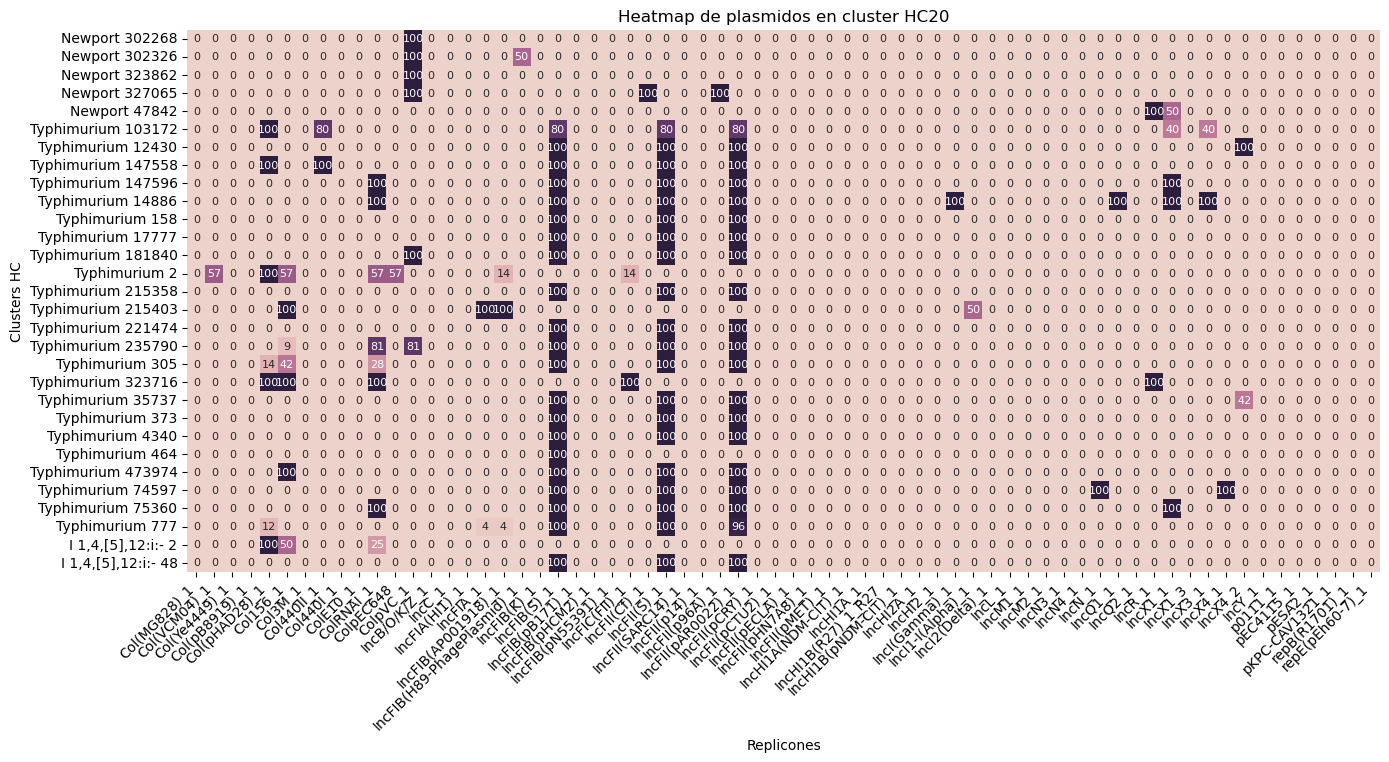

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Normalización y cálculo del porcentaje para los datos simulados
heat_map = matrix_genomas_HC.apply(
    lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), 
    axis=1
)

# Seleccionar la primera mitad de la matriz
half_rows = len(heat_map) // 2
heat_map_half = heat_map.iloc[half_rows:]

# Generar el heatmap
plt.figure(figsize=(14, 16))
ax = sns.heatmap(
    heat_map_half, 
    cmap=sns.cubehelix_palette(as_cmap=True), 
    cbar=False, 
    linecolor='#d5fcd4', 
    square=True, 
    annot=heat_map_half, 
    fmt="d", 
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha='right')
plt.title('Heatmap de plasmidos en cluster HC20')
plt.xlabel('Replicones')
plt.ylabel('Clusters HC')
plt.tight_layout()

# Guardar la imagen
plt.savefig('heatmap_HC_second_half.png', format='png', bbox_inches='tight', dpi=900)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'presentacion-mg/heatmap_HC20_de_importancia.png'

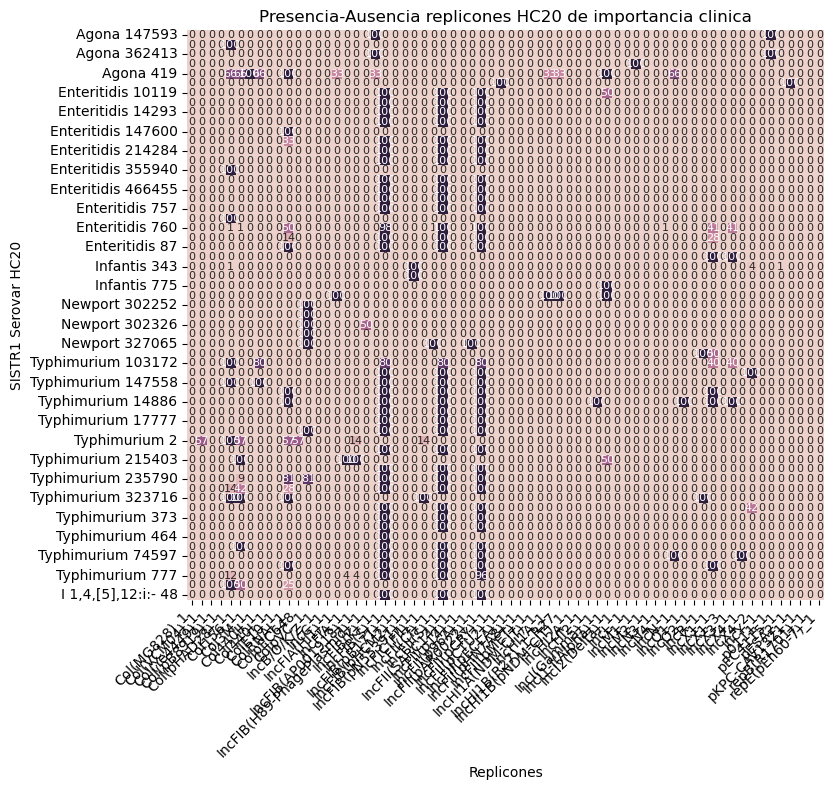

In [28]:
"""
Mapa de calor, porcentaje replicones en cluster HC de importancia clinica
"""
HC = 'HC20'
heat_map = matrix_genomas_HC.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'Presencia-Ausencia replicones {HC} de importancia clinica')
plt.xlabel('Replicones')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'presentacion-mg/heatmap_{HC}_de_importancia.png', format='png', bbox_inches='tight')
plt.show()

### HC50  SAP111315

In [15]:
"""
Se coloca como index los cluster HC
"""
db_HC = db.set_index('SISTR1 Serovar HC50')
db_HC = db_HC.sort_values(by='SISTR1 Serovar HC50')
db_HC = db_HC.drop(columns=['SISTR1 Serovar HC20'])
# Agrupo
matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC50').sum()
# Ordeno mono de Typhimurium
mono = ['I 1,4,[5],12:i:- 2', 'I 1,4,[5],12:i:- 48']
new_sort = [idx for idx in matrix_genomas_HC.index if idx not in mono] + mono
matrix_genomas_HC = matrix_genomas_HC.reindex(new_sort)
matrix_genomas_HC

/tmp/ipykernel_9145/4031769569.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC50').sum()


,Col(MG828)_1,Col(VCM04)_1,Col(Ye4449)_1,Col(pB8919)_1,Col(pHAD28)_1,Col156_1,Col3M_1,Col440II_1,Col440I_1,ColE10_1,...,IncX3_1,IncX4_1,IncX4_2,IncY_1,p0111_1,pEC4115_1,pESA2_1,pKPC-CAV1321_1,repB(R1701)_1,repE(pEh60-7)_1
SISTR1 Serovar HC50,,,,,,,,,,,,,,,,,,,,,
Adelaide 2895,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Agona 147593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Agona 29,0,0,0,0,3,2,3,2,0,0,...,0,0,0,0,1,0,2,0,0,0
Amager 1458,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Anatum 7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Typhimurium 5196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Typhimurium 92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Worthington 35,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


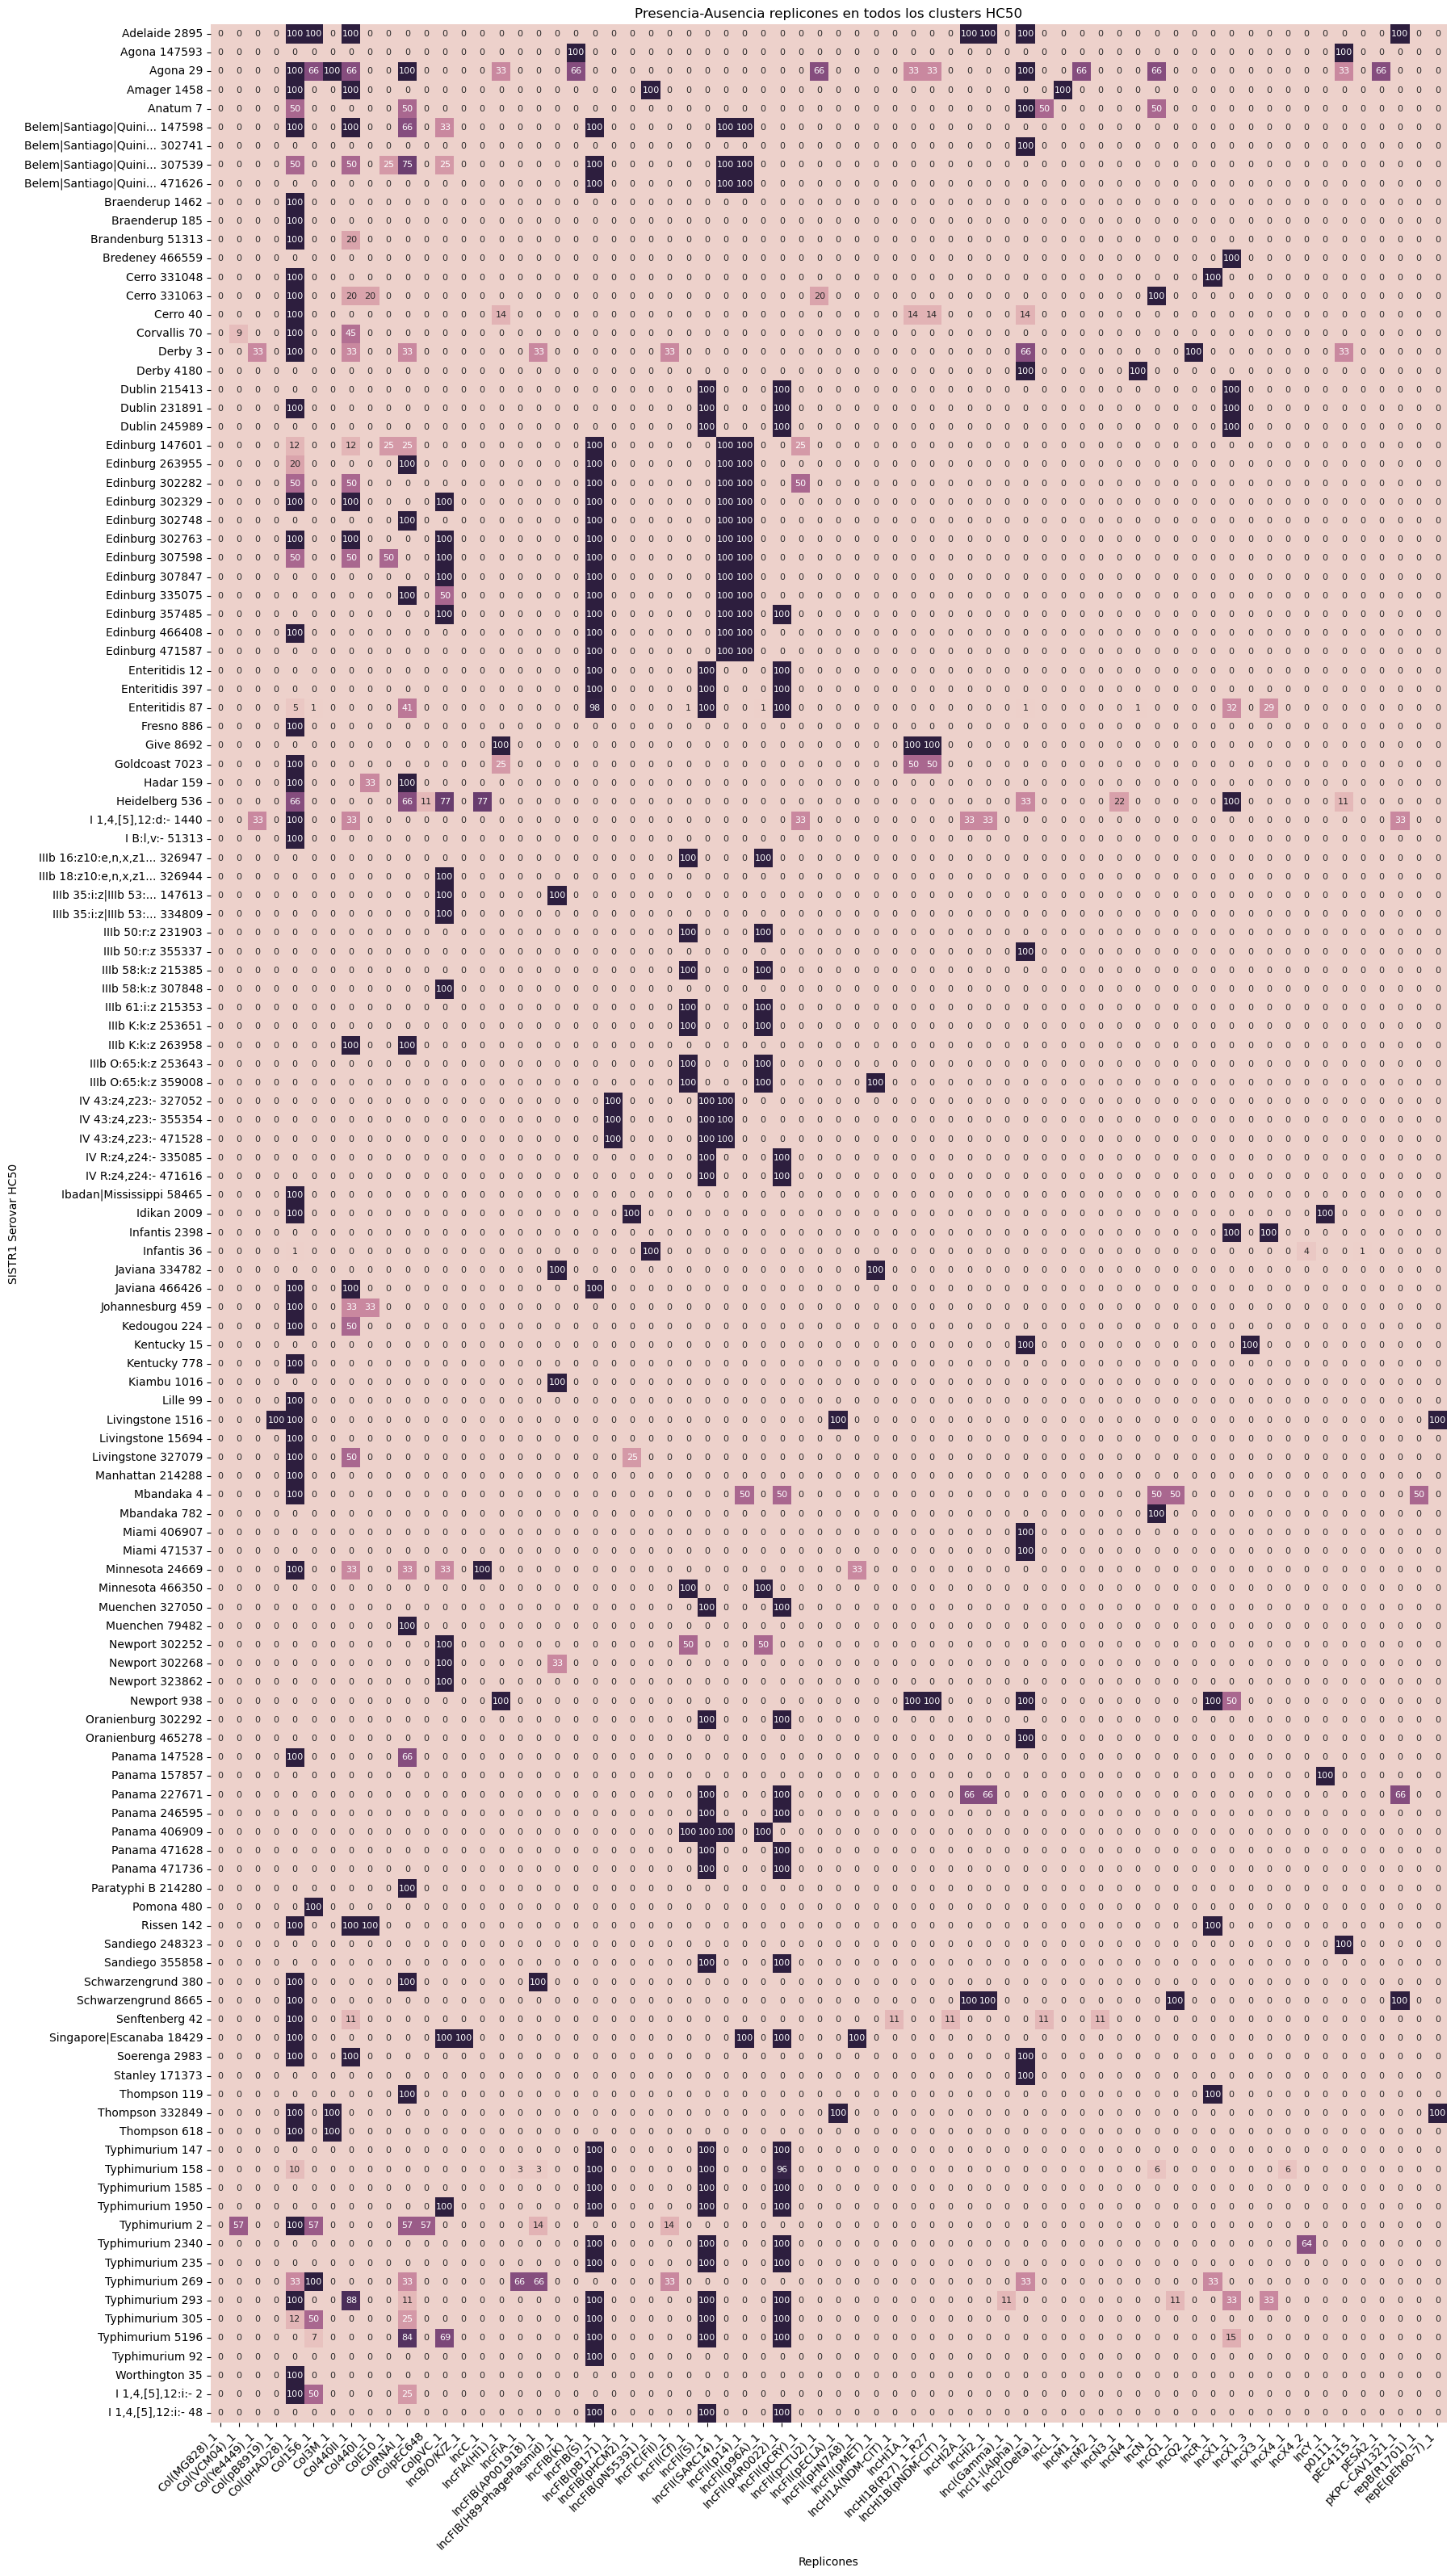

In [16]:
"""
Mapa de calor, porcentaje replicones en cluster HC
"""
HC = 'HC50'
heat_map = matrix_genomas_HC.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(36, 32))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'Presencia-Ausencia replicones en todos los clusters {HC}')
plt.xlabel('Replicones')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_replicon.png', format='png', bbox_inches='tight')
plt.show()

In [17]:
"""
Se coloca como index de los cluster HC de importancia
"""
db_HC_de_importancia = db[db.index.isin(SEROTIPOS)]
db_HC = db_HC_de_importancia.set_index('SISTR1 Serovar HC50')
db_HC = db_HC.sort_values(by='SISTR1 Serovar HC50')
db_HC = db_HC.drop(columns=['SISTR1 Serovar HC20'])
# Agrupo
matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC50').sum()
# Ordeno mono de Typhimurium
mono = ['I 1,4,[5],12:i:- 2', 'I 1,4,[5],12:i:- 48']
new_sort = [idx for idx in matrix_genomas_HC.index if idx not in mono] + mono
matrix_genomas_HC = matrix_genomas_HC.reindex(new_sort)
matrix_genomas_HC.head(4)

/tmp/ipykernel_9145/584377315.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matrix_genomas_HC = db_HC.groupby(f'SISTR1 Serovar HC50').sum()


,Col(MG828)_1,Col(VCM04)_1,Col(Ye4449)_1,Col(pB8919)_1,Col(pHAD28)_1,Col156_1,Col3M_1,Col440II_1,Col440I_1,ColE10_1,...,IncX3_1,IncX4_1,IncX4_2,IncY_1,p0111_1,pEC4115_1,pESA2_1,pKPC-CAV1321_1,repB(R1701)_1,repE(pEh60-7)_1
SISTR1 Serovar HC50,,,,,,,,,,,,,,,,,,,,,
Agona 147593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Agona 29,0,0,0,0,3,2,3,2,0,0,...,0,0,0,0,1,0,2,0,0,0
Enteritidis 12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Enteritidis 397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


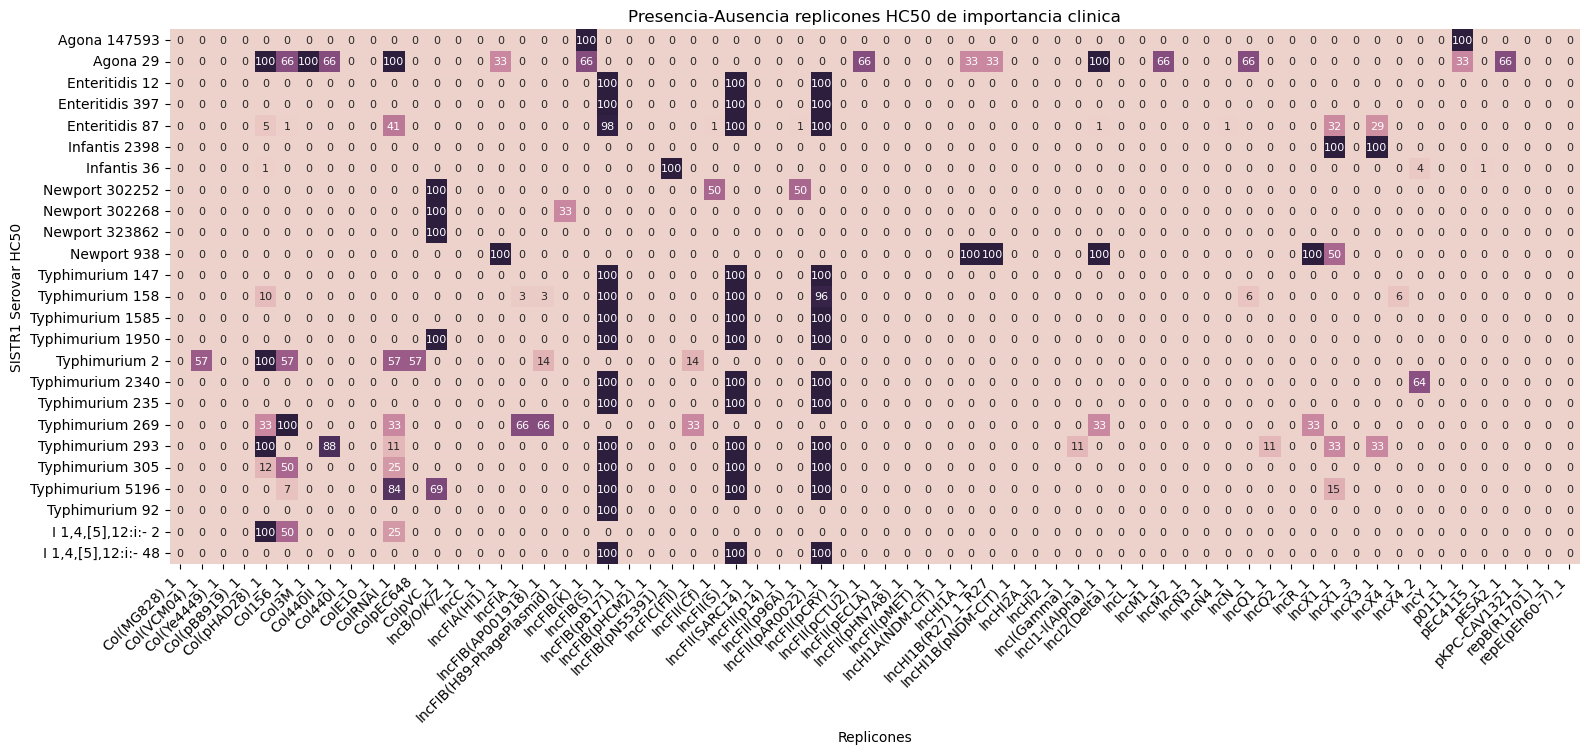

In [21]:
"""
Mapa de calor, porcentaje replicones en cluster HC de importancia clinica
"""
HC = 'HC50'
heat_map = matrix_genomas_HC.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(16, 14))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'Presencia-Ausencia replicones {HC} de importancia clinica')
plt.xlabel('Replicones')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'presentacion-img/heatmap_{HC}_de_importancia.png', format='png', bbox_inches='tight', dpi=900)
plt.show()